<a href="https://colab.research.google.com/github/zer0NPR/Ai-Notification-when-abnormal/blob/master/Notification_when_abnormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
  # lodaing data
data = pd.read_csv('/content/pressure.csv')

In [11]:
data.head(-1)

,Age,Sex,Pulse,Pressure,Blood oxygen,Body temperature,target
0,78,1,80,120,99,36.5,0
1,67,1,75,126,100,36.8,0
2,82,1,98,201,98,36.7,3
3,69,0,93,169,98,36.2,2
4,85,1,69,110,99,35.9,0
...,...,...,...,...,...,...,...
213,82,0,94,107,96,36.5,0
214,74,0,95,142,99,36.0,1
215,73,1,55,112,94,36.9,1
216,74,0,75,196,94,37.0,3


In [4]:
data.shape

(219, 7)

In [12]:
# checking for missing values
data.isnull().sum()

Age                 0
Sex                 0
Pulse               0
Pressure            0
Blood oxygen        0
Body temperature    0
target              0
dtype: int64

In [13]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               219 non-null    int64  
 1   Sex               219 non-null    int64  
 2   Pulse             219 non-null    int64  
 3   Pressure          219 non-null    int64  
 4   Blood oxygen      219 non-null    int64  
 5   Body temperature  219 non-null    float64
 6   target            219 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 12.1 KB


In [14]:
data.describe()

,Age,Sex,Pulse,Pressure,Blood oxygen,Body temperature,target
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,80.821918,0.465753,75.863014,149.616438,95.593607,36.438356,1.388128
std,9.977970,0.499969,14.910727,32.837226,3.152712,0.337542,1.075177
min,65.000000,0.000000,50.000000,91.000000,90.000000,35.700000,0.000000
25%,72.000000,0.000000,63.000000,123.000000,93.000000,36.200000,1.000000
50%,80.000000,0.000000,75.000000,145.000000,96.000000,36.400000,1.000000
75%,90.000000,1.000000,88.000000,177.000000,98.000000,36.700000,2.000000
max,99.000000,1.000000,100.000000,210.000000,100.000000,37.000000,3.000000


In [15]:
data['target'].value_counts()

1    84
3    50
0    50
2    35
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


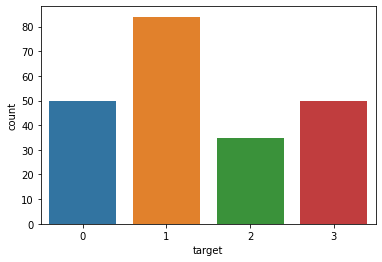

In [16]:
sns.countplot(data['target'])

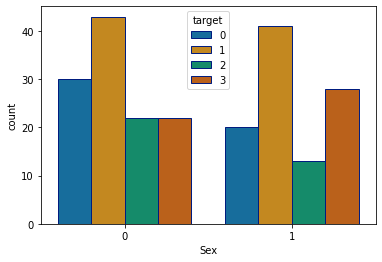

In [17]:
data['Sex']=pd.to_numeric(data['Sex'],downcast='integer')

sns.countplot(x='Sex',hue='target',data=data,palette='colorblind',edgecolor=sns.color_palette('dark', n_colors=1))

In [18]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=2)

In [20]:
model = LogisticRegression()


In [21]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
# training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8625954198473282


In [23]:
#  test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8863636363636364


In [25]:
#input_data = (90,0,70,120,78,36.7)
input_data = (90,1,98,201,99,36.7)
input_data_as_numpy_array= np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('ปกติ')
if (prediction[0]== 1):
  print('ผู้สูงอายุผิดปกติระดับที่ 1')
if (prediction[0]== 2):
  print('ผู้สูงอายุผิดปกติระดับ 2')
if (prediction[0]== 3):
   print('ผู้สูงอายุผิดปกติระดับ 3')


[3]
ผู้สูงอายุผิดปกติระดับ 3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
